In [49]:

import pandas as pd
import geopandas as gpd

import json
import requests


startDate = '2021-01-01T00'
endDate = startDate
BBOX = '-118.95,33.71,-117.65,34.83'
requestString = 'https://www.airnowapi.org/aq/data/?startDate={}&endDate={}&parameters=PM25&BBOX={}&dataType=B&format=application/json&verbose=1&monitorType=0&includerawconcentrations=0&API_KEY=4D443089-5C44-482F-8311-A46004897DA2'.format(startDate, endDate, BBOX)
r = requests.get(requestString)
d = json.loads(r.text)
df = pd.DataFrame(d) #convert to dataframe
df

,Latitude,Longitude,UTC,Parameter,Unit,Value,AQI,Category,SiteName,AgencyName,FullAQSCode,IntlAQSCode
0,34.210170,-118.870510,2021-01-01T00:00,PM2.5,UG/M3,0.6,3,1,Thousand Oaks - Moorpark Road,Ventura County APCD,061110007,840061110007
1,34.404280,-118.809980,2021-01-01T00:00,PM2.5,UG/M3,0.0,0,1,Piru - Pacific,Ventura County APCD,061110009,840061110009
2,34.276320,-118.683690,2021-01-01T00:00,PM2.5,UG/M3,1.0,4,1,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
3,34.199200,-118.533100,2021-01-01T00:00,PM2.5,UG/M3,2.7,11,1,Reseda,South Coast AQMD,060371201,840060371201
4,34.383300,-118.528300,2021-01-01T00:00,PM2.5,UG/M3,2.6,11,1,Santa Clarita,South Coast AQMD,060376012,840060376012
5,34.181977,-118.363036,2021-01-01T00:00,PM2.5,UG/M3,4.1,17,1,North Holywood,South Coast AQMD,840060374010,840060374010
6,33.901400,-118.205000,2021-01-01T00:00,PM2.5,UG/M3,3.2,13,1,Compton,South Coast AQMD,060371302,840060371302
7,33.792221,-118.175278,2021-01-01T00:00,PM2.5,UG/M3,7.0,29,1,South Long Beach,South Coast AQMD,060374004,840060374004
8,34.669589,-118.130689,2021-01-01T00:00,PM2.5,UG/M3,3.3,14,1,Lancaster-Division,Mojave Desert AQMD,060379033,840060379033
9,33.830586,-117.938509,2021-01-01T00:00,PM2.5,UG/M3,4.0,17,1,Anaheim,South Coast AQMD,060590007,840060590007


<AxesSubplot:title={'center':'Concentration of PM2.5 in LA County at 2021-01-01T00'}, xlabel='SiteName'>

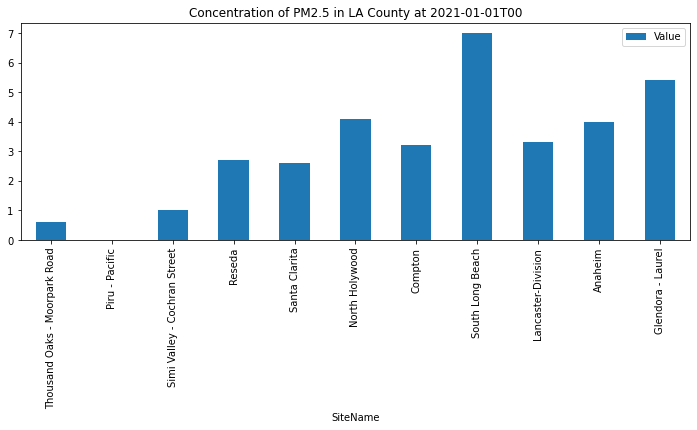

In [57]:
df.plot.bar(figsize=(12,4), x='SiteName', y='Value', title='Concentration of PM2.5 in LA County at {}'.format(startDate) )


<AxesSubplot:xlabel='SiteName'>

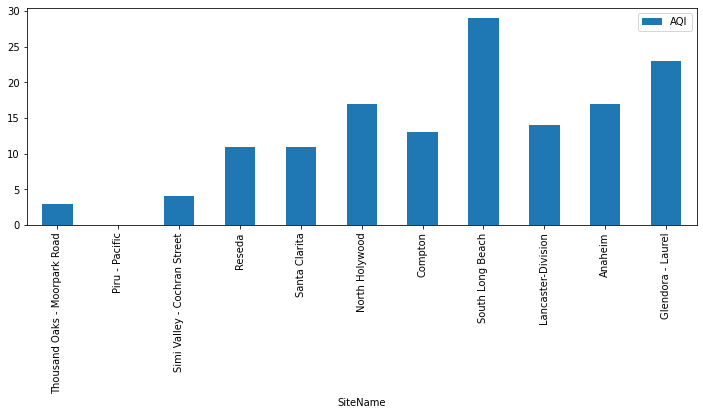

In [51]:
df.plot.bar(figsize=(12,4), x='SiteName', y='AQI')

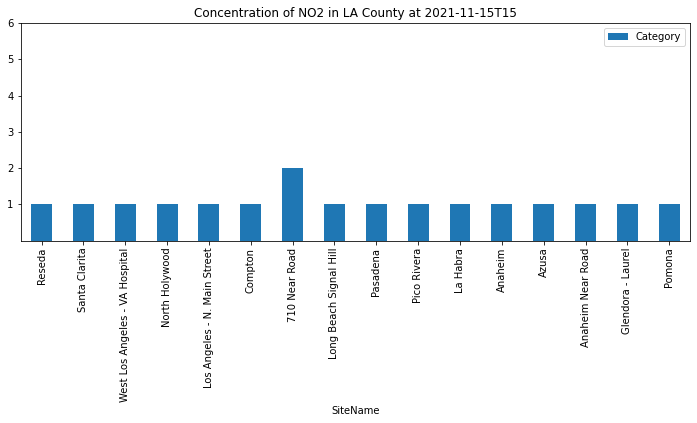

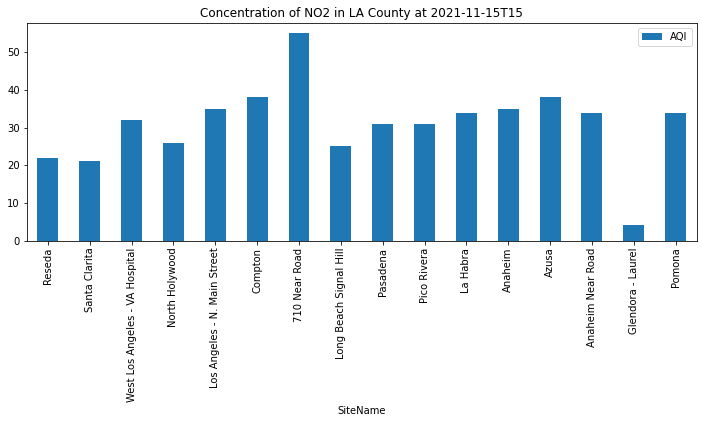

In [5]:
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import geopandas as gpd
import json
import requests

#This function yields a map of the Concentration and AQI at Monitering Sites in LA County of the desired pollutant at a given date/hour
def air_quality(startDate, parameters): 
    endDate = startDate
    BBOX = '-118.95,33.71,-117.65,34.83'
    API_KEY='4D443089-5C44-482F-8311-A46004897DA2'
    requestString = 'https://www.airnowapi.org/aq/data/?startDate={}&endDate={}&parameters={}&BBOX={}&dataType=B&format=application/json&verbose=1&monitorType=0&includerawconcentrations=0&API_KEY={}'.format(startDate, endDate, parameters, BBOX, API_KEY)
    r = requests.get(requestString)
    d = json.loads(r.text)
    df = pd.DataFrame(d) #convert to dataframe
    
    df.plot.bar(figsize=(12,4), x='SiteName', y='Category', yticks=[1,2,3,4,5,6],  title='Concentration of {} in LA County at {}'.format(parameters,startDate) )
    df.plot.bar(figsize=(12,4), x='SiteName', y='AQI', title='Concentration of {} in LA County at {}'.format(parameters,startDate) )
   

air_quality('2021-11-15T15', 'NO2')
#start_date is in YYYY-MM-DDTHH format
#parameter options = O3, PM25, PM10, CO, NO2, SO2 
    

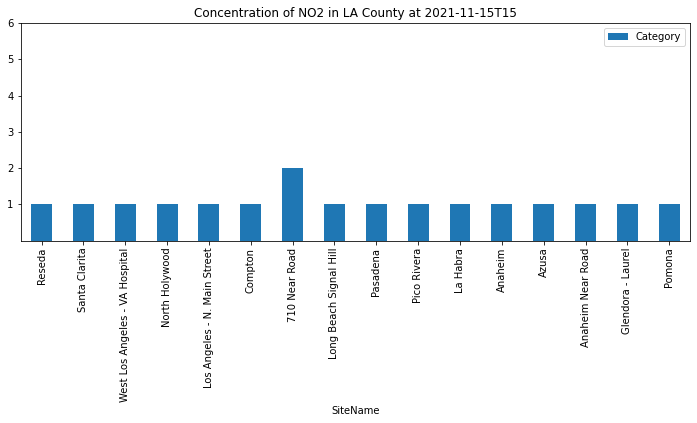

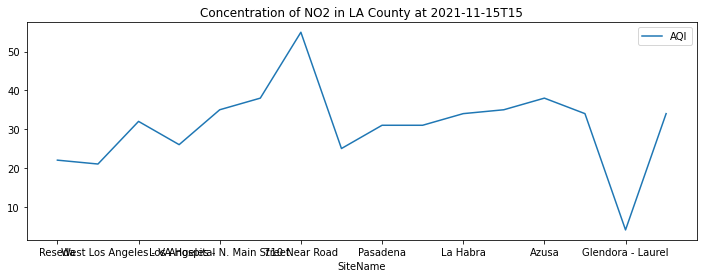

In [4]:
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import geopandas as gpd
import json
import requests

#This function yields a map of the Concentration and AQI at Monitering Sites in LA County of the desired pollutant at a given date/hour
def air_quality(startDate, parameters): 
    endDate = startDate
    BBOX = '-118.95,33.71,-117.65,34.83'
    API_KEY='4D443089-5C44-482F-8311-A46004897DA2'
    requestString = 'https://www.airnowapi.org/aq/data/?startDate={}T00&endDate={}T23&parameters={}&BBOX={}&dataType=B&format=application/json&verbose=1&monitorType=0&includerawconcentrations=0&API_KEY={}'.format(startDate, endDate, parameters, BBOX, API_KEY)
    r = requests.get(requestString)
    d = json.loads(r.text)
    df = pd.DataFrame(d) #convert to dataframe
    
    df.plot(figsize=(12,4), x='SiteName', y='Category', yticks=[1,2,3,4,5,6],  title='Concentration of {} in LA County at {}'.format(parameters,startDate) )
    df.plot(figsize=(12,4), x='SiteName', y='AQI', title='Concentration of {} in LA County at {}'.format(parameters,startDate) )
   

air_quality('2021-11-15', 'NO2')
#start_date is in YYYY-MM-DDTHH format
#parameter options = O3, PM25, PM10, CO, NO2, SO2 

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import geopandas as gpd
import json
import requests

#This function yields a map of the Concentration and AQI at Monitering Sites in LA County of the desired pollutant at a given date/hour
def air_quality(startDate): 
    endDate = startDate
    BBOX = '-118.95,33.71,-117.65,34.83'
    API_KEY='4D443089-5C44-482F-8311-A46004897DA2'
    List = [O3, PM25, PM10, CO, NO2, SO2]
    requestString = 'https://www.airnowapi.org/aq/data/?startDate={}&endDate={}&parameters={}&BBOX={}&dataType=B&format=application/json&verbose=1&monitorType=0&includerawconcentrations=0&API_KEY={}'.format(startDate, endDate, parameters, BBOX, API_KEY)
    r = requests.get(requestString)
    d = json.loads(r.text)
    df = pd.DataFrame(d) #convert to dataframe
    
    df.plot.bar(figsize=(12,4), x='SiteName', y='Value', title='Concentration of Pollutants in LA County at {}'.format(startDate) )
  
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)
   

air_quality('2021-11-15T15')
#start_date is in YYYY-MM-DDTHH format
#parameter options = O3, PM25, PM10, CO, NO2, SO2 

In [58]:
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head()


,Latitude,Longitude,UTC,Parameter,Unit,Value,AQI,Category,SiteName,AgencyName,FullAQSCode,IntlAQSCode,geometry
0,34.21017,-118.87051,2021-01-01T00:00,PM2.5,UG/M3,0.6,3,1,Thousand Oaks - Moorpark Road,Ventura County APCD,061110007,840061110007,POINT (-118.87051 34.21017)
1,34.40428,-118.80998,2021-01-01T00:00,PM2.5,UG/M3,0.0,0,1,Piru - Pacific,Ventura County APCD,061110009,840061110009,POINT (-118.80998 34.40428)
2,34.27632,-118.68369,2021-01-01T00:00,PM2.5,UG/M3,1.0,4,1,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002,POINT (-118.68369 34.27632)
3,34.19920,-118.53310,2021-01-01T00:00,PM2.5,UG/M3,2.7,11,1,Reseda,South Coast AQMD,060371201,840060371201,POINT (-118.53310 34.19920)
4,34.38330,-118.52830,2021-01-01T00:00,PM2.5,UG/M3,2.6,11,1,Santa Clarita,South Coast AQMD,060376012,840060376012,POINT (-118.52830 34.38330)


In [131]:
# output the data's projection
gdf.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Latitude     11 non-null     float64 
 1   Longitude    11 non-null     float64 
 2   UTC          11 non-null     object  
 3   Parameter    11 non-null     object  
 4   Unit         11 non-null     object  
 5   Value        11 non-null     float64 
 6   AQI          11 non-null     int64   
 7   Category     11 non-null     int64   
 8   SiteName     11 non-null     object  
 9   AgencyName   11 non-null     object  
 10  FullAQSCode  11 non-null     object  
 11  IntlAQSCode  11 non-null     object  
 12  geometry     11 non-null     geometry
dtypes: float64(3), geometry(1), int64(2), object(7)
memory usage: 1.2+ KB


In [60]:
# WGS 84 indicates the data is geographic
# reproject to web mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)

Text(0.5, 1.0, 'Concentration of PM2.5 in LA County at 2021-01-01T00')

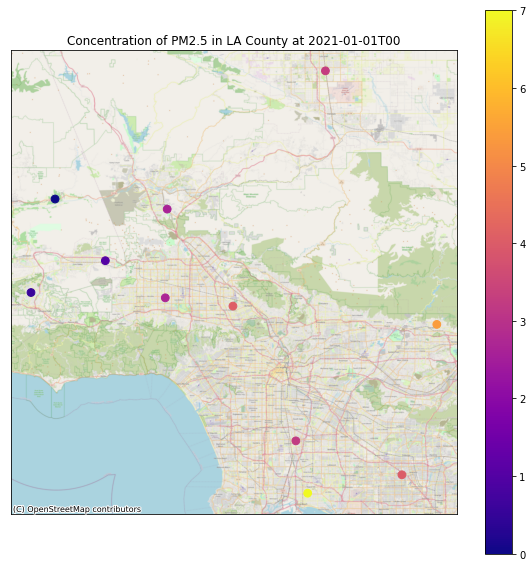

In [71]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(1,1,figsize=(10,10))

gdf.to_crs('EPSG:3857').plot('Value', ax=ax, markersize=60,  cmap='plasma', legend=True, 
               legend_kwds={'orientation': 'vertical'})
ax.set_facecolor('k')
ctx.add_basemap(ax=ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Concentration of PM2.5 in LA County at {}'.format(startDate))

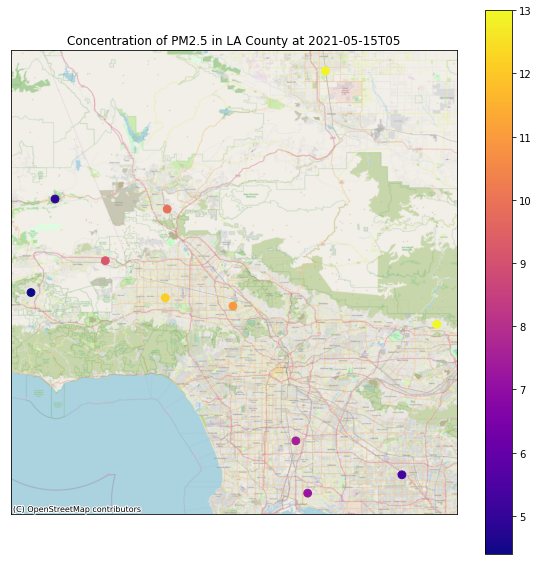

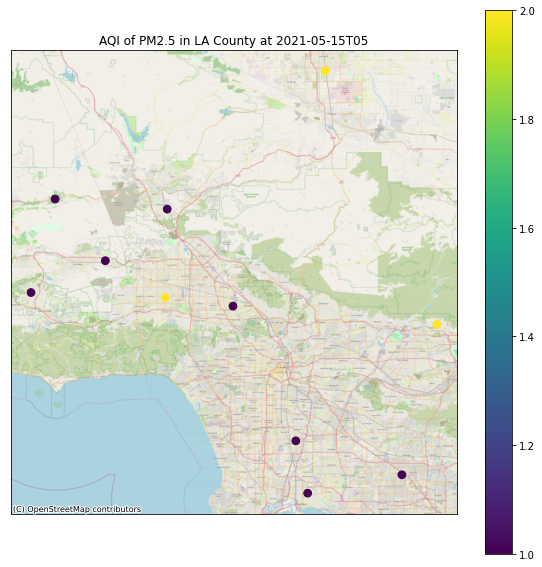

In [120]:
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import geopandas as gpd
import json
import requests

def air_quality(startDate): 
    endDate = startDate
    BBOX = '-118.95,33.71,-117.65,34.83'
    requestString = 'https://www.airnowapi.org/aq/data/?startDate={}&endDate={}&parameters=PM25&BBOX={}&dataType=B&format=application/json&verbose=1&monitorType=0&includerawconcentrations=0&API_KEY=4D443089-5C44-482F-8311-A46004897DA2'.format(startDate, endDate, BBOX)
    r = requests.get(requestString)
    d = json.loads(r.text)
    df = pd.DataFrame(d) #convert to dataframe
    gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude)) #convert to geodataframe for mapping
    # reproject to web mercator
    gdf_web_mercator = gdf.to_crs(epsg=3857)
    #plot map
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    gdf.to_crs('EPSG:3857').plot('Value', ax=ax, markersize=60,  cmap='plasma', legend=True, 
               legend_kwds={'orientation': 'vertical'})
    ax.set_facecolor('k')
    ctx.add_basemap(ax=ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Concentration of PM2.5 in LA County at {}'.format(startDate))

    #plot map
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    gdf.to_crs('EPSG:3857').plot('Category', ax=ax, markersize=60, legend=True)
    ax.set_facecolor('k')
    ctx.add_basemap(ax=ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('AQI of PM2.5 in LA County at {}'.format(startDate))
 
  



air_quality('2021-05-15T05') 

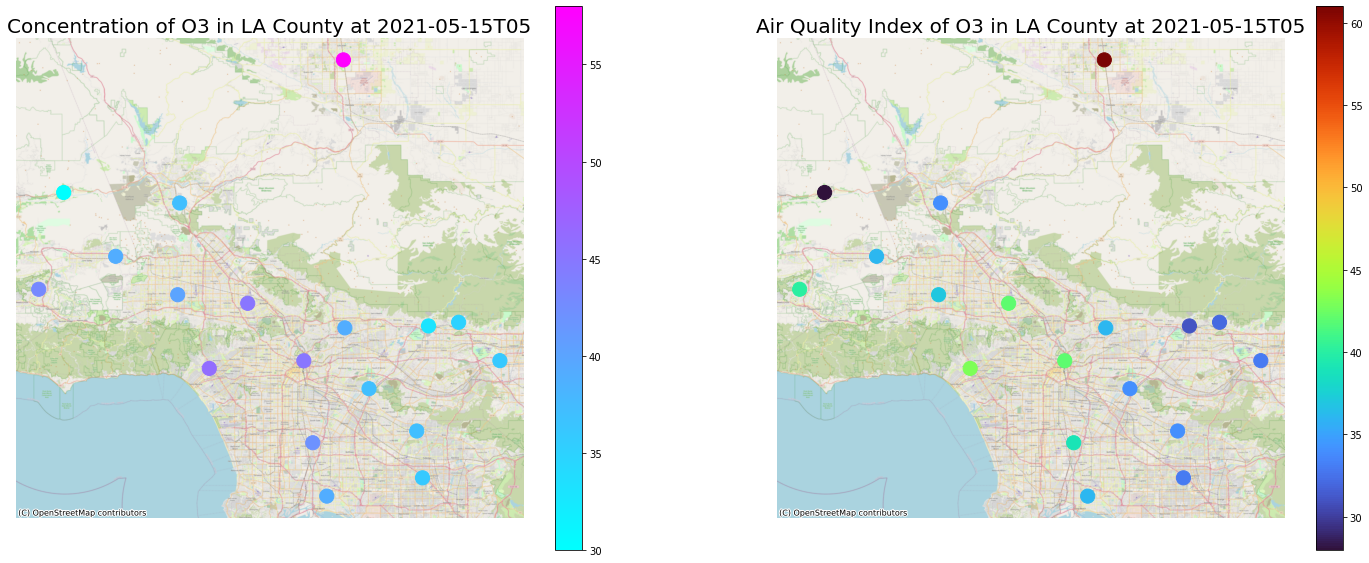

In [169]:
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import geopandas as gpd
import json
import requests

#Th
def air_quality(startDate, parameters): 
    endDate = startDate
    BBOX = '-118.95,33.71,-117.65,34.83'
    API_KEY='4D443089-5C44-482F-8311-A46004897DA2'
    requestString = 'https://www.airnowapi.org/aq/data/?startDate={}&endDate={}&parameters={}&BBOX={}&dataType=B&format=application/json&verbose=1&monitorType=0&includerawconcentrations=0&API_KEY={}'.format(startDate, endDate, parameters, BBOX, API_KEY)
    r = requests.get(requestString)
    d = json.loads(r.text)
    df = pd.DataFrame(d) #convert to dataframe
    gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude)) #convert to geodataframe for mapping
    # reproject to web mercator
    gdf_web_mercator = gdf.to_crs(epsg=3857)
    #plot map
    fig, axs = plt.subplots(1,2,figsize=(25,10))
    ax1, ax2 = axs
    
    #a1 - Concentration
    gdf.to_crs('EPSG:3857').plot('Value', ax=ax1, markersize=200,  cmap='cool', legend=True, 
               legend_kwds={'orientation': 'vertical'})
    ax1.set_facecolor('k')
    ctx.add_basemap(ax=ax1, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)
    ax1.axis("off")
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title('Concentration of {} in LA County at {}'.format(parameters, startDate), fontsize = 20)

    #a2 - Air Quality Index-AQI
    gdf.to_crs('EPSG:3857').plot('AQI', ax=ax2, cmap='turbo', markersize=200, legend=True)
    ax2.set_facecolor('k')
    ctx.add_basemap(ax=ax2, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)
    ax2.axis("off")
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title('Air Quality Index of {} in LA County at {}'.format(parameters, startDate), fontsize = 20)
    
    df.plot.bar(figsize=(12,4),
                x='SiteName', 
                y='Category', 
                yticks=[1,2,3,4,5,6],  
                title='Concentration of {} in LA County at {}'.format(parameters,startDate) )
 

air_quality('2021-05-15T05', 'O3') 
#start_date is in YYYY-MM-DDTHH format
#parameter options = O3, PM25, PM10, CO, NO2, SO2 

